in this project I'll be descovering and cleaning the dataset hotel source:
https://www.kaggle.com/jessemostipak/hotel-booking-demand?select=hotel_bookings.csv
We are trying to findout what is the best time of the year to book a room


In [150]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
hotel=pd.read_csv('hotel_bookings.csv')
hotel.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [151]:
hotel.shape

(119390, 32)

First step is to remove the dublicates 

freq=hotel['arrival_date_month'].value_counts(dropna=True)
freq.plot(kind='bar')
freq.head(12)

In [152]:
hotel.drop_duplicates(inplace=True)
hotel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87396 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  int64  
 2   lead_time                       87396 non-null  int64  
 3   arrival_date_year               87396 non-null  int64  
 4   arrival_date_month              87396 non-null  object 
 5   arrival_date_week_number        87396 non-null  int64  
 6   arrival_date_day_of_month       87396 non-null  int64  
 7   stays_in_weekend_nights         87396 non-null  int64  
 8   stays_in_week_nights            87396 non-null  int64  
 9   adults                          87396 non-null  int64  
 10  children                        87392 non-null  float64
 11  babies                          87396 non-null  int64  
 12  meal                           

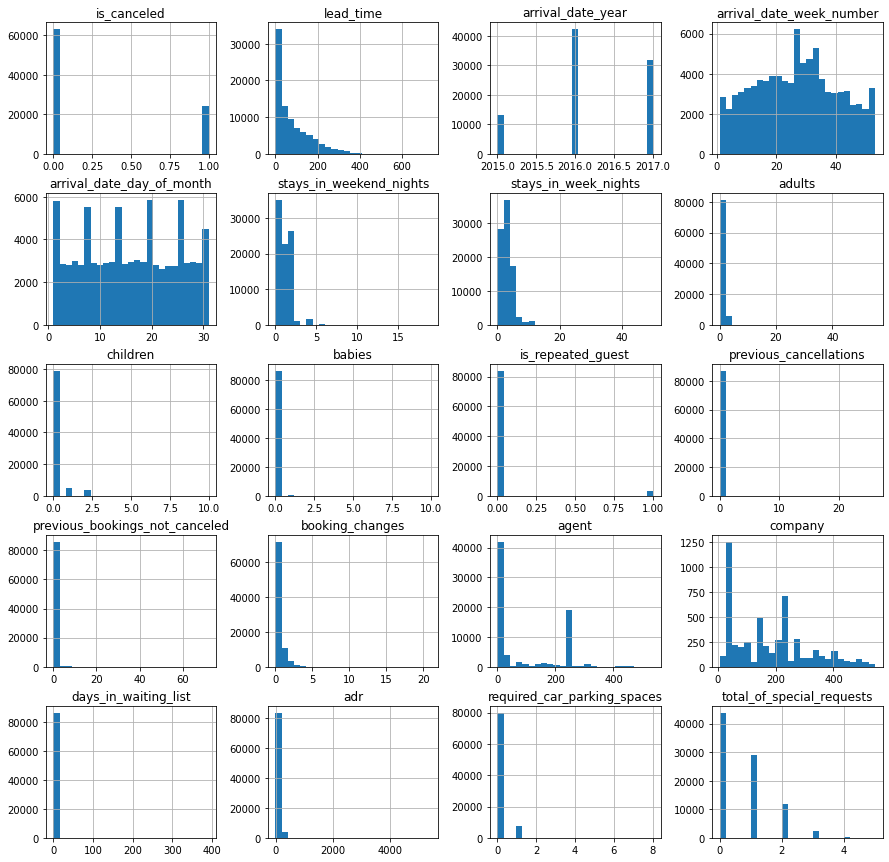

In [153]:
hotel.hist(figsize=(15,15),bins=25);

In [154]:
hotel.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87392.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,75203.000000,5259.000000,87396.000000,87396.000000,87396.000000,87396.000000
mean,0.274898,79.891368,2016.210296,26.838334,15.815541,1.005263,2.625395,1.875795,0.138640,0.010824,0.039075,0.030413,0.183990,0.271603,94.138306,183.081384,0.749565,106.337246,0.084226,0.698567
std,0.446466,86.052325,0.686102,13.674572,8.835146,1.031921,2.053584,0.626500,0.455881,0.113597,0.193775,0.369145,1.731894,0.727245,113.188172,130.557608,10.015731,55.013953,0.281533,0.831946
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,47.000000,0.000000,72.000000,0.000000,0.000000
50%,0.000000,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,169.000000,0.000000,98.100000,0.000000,0.000000
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.000000,263.000000,0.000000,134.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


<AxesSubplot:>

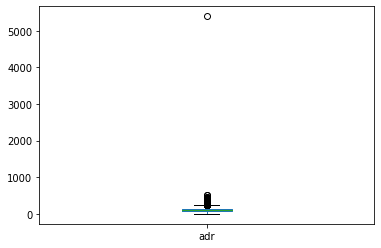

In [155]:
hotel.adr.plot(kind='box')


it seems as expexted adr has huge outliers and negative values will be removed

<AxesSubplot:>

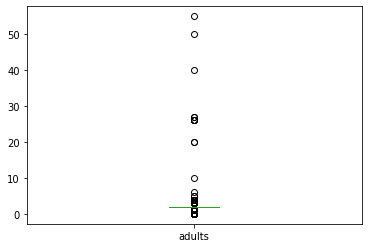

In [156]:
hotel.adults.plot(kind='box')

adults has some outliers

<AxesSubplot:>

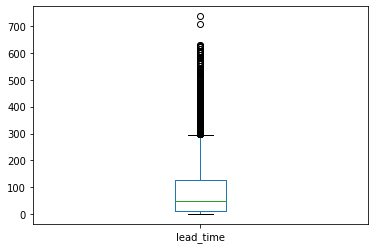

In [157]:
hotel.lead_time.plot(kind='box')

lead time is full of outliers will be removed as well as that it is not useful in any way

In [158]:
#unwanted col 
hotel.drop(['is_repeated_guest','previous_cancellations','previous_bookings_not_canceled','booking_changes','company','agent','days_in_waiting_list','required_car_parking_spaces','reservation_status_date','adr','lead_time'],axis=1,inplace=True)
hotel.head()

,hotel,is_canceled,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,total_of_special_requests,reservation_status
0,Resort Hotel,0,2015,July,27,1,0,0,2,0.0,...,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,0,Check-Out
1,Resort Hotel,0,2015,July,27,1,0,0,2,0.0,...,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,0,Check-Out
2,Resort Hotel,0,2015,July,27,1,0,1,1,0.0,...,BB,GBR,Direct,Direct,A,C,No Deposit,Transient,0,Check-Out
3,Resort Hotel,0,2015,July,27,1,0,1,1,0.0,...,BB,GBR,Corporate,Corporate,A,A,No Deposit,Transient,0,Check-Out
4,Resort Hotel,0,2015,July,27,1,0,2,2,0.0,...,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,1,Check-Out


In [159]:
#removing records where country is null
hotel.drop(hotel.loc[hotel.country.isnull()].index,inplace=True)
hotel.country.isnull().sum()

0

In [160]:
#children from float to int
hotel.children.loc[hotel.children.isnull()]=0
hotel.children=hotel.children.astype(int)

In [161]:
#removing outliers from adults
desc=hotel.adults.describe()
Q1=desc.loc['25%']
Q3=desc.loc['75%']
IQR=(Q3-Q1)*1.5
max_thresh=min(Q3+ IQR, desc.loc['max'])
#drop anything bigger than the threshold
hotel.drop(hotel.loc[hotel.adults>maxVal].index,inplace=True)

In [162]:
#from mounth to number using dictionary
dic={'January':1,'February':2,'March':3,'April':4,'May':5,'June':6,'July':7,'August':8,'September':9,'October':10,'November':11,'December':12}
hotel.arrival_date_month=hotel.arrival_date_month.map(dic)

descovering the data and looking for null/ NA values

In [164]:
hotel.describe()

,is_canceled,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,total_of_special_requests
count,80937.000000,80937.000000,80937.000000,80937.000000,80937.000000,80937.000000,80937.000000,80937.000000,80937.000000,80937.000000,80937.000000
mean,0.270989,2016.201626,6.472417,26.824963,15.802427,1.005029,2.621718,1.790281,0.142592,0.011478,0.687028
std,0.444473,0.690117,3.120082,13.772594,8.837507,1.034524,2.064736,0.418484,0.465517,0.117021,0.823621
min,0.000000,2015.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2016.000000,4.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000
50%,0.000000,2016.000000,7.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000
75%,1.000000,2017.000000,9.000000,38.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,1.000000
max,1.000000,2017.000000,12.000000,53.000000,31.000000,16.000000,41.000000,2.000000,10.000000,10.000000,5.000000


In [163]:
#For grouping data by 'hotel' col as it has to unique values

# ResortHotel=hotel[(hotel['hotel']=='Resort Hotel')]
# hotel.drop(hotel.loc[hotel['hotel']=='Resort Hotel'].index, inplace=True)

# CityHotel=hotel[(hotel['hotel']=='City Hotel')]
# hotel.drop(hotel.loc[hotel['hotel']=='City Hotel'].index, inplace=True)
